# Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
train_data = pd.read_csv('samsum-train.csv')
val_data = pd.read_csv('samsum-validation.csv')
test_data = pd.read_csv('samsum-test.csv')


In [29]:
train_data


,dialogue,summary,input_len
0,amanda baked cookies want jerry sure amanda il...,amanda baked cookies bring jerry tomorrow,18
1,olivia voting election oliver liberals always ...,olivia olivier voting liberals election,17
2,tim hi whats kim bad mood tbh going lots stuff...,kim may try pomodoro technique recommended tim...,105
3,edward rachel think im ove bella rachel dont s...,edward thinks love bella rachel wants edward o...,39
4,sam hey overheard rick say something sam dont ...,sam confused overheard rick complaining roomma...,181
...,...,...,...
14726,romeo people may know list greta ah maybe chan...,romeo trying get greta add friend list refuses,51
14727,theresa theresa theresa hey louise u theresa w...,theresa work gets free food free yoga classes ...,166
14728,john every day bad news japan hunt whales eric...,japan going hunt whales island norway never st...,139
14729,jennifer dear celia jennifer afternoon collins...,celia couldnt make afternoon collins jennifer ...,267


In [3]:
test_data

,id,dialogue,summary
0,13862856,"Hannah: Hey, do you have Betty's number?\nAman...",Hannah needs Betty's number but Amanda doesn't...
1,13729565,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...,Eric and Rob are going to watch a stand-up on ...
2,13680171,"Lenny: Babe, can you help me with something?\r...",Lenny can't decide which trousers to buy. Bob ...
3,13729438,"Will: hey babe, what do you want for dinner to...",Emma will be home soon and she will let Will k...
4,13828600,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju...",Jane is in Warsaw. Ollie and Jane has a party....
...,...,...,...
814,13611902-1,Alex: Were you able to attend Friday night's b...,Benjamin didn't come to see a basketball game ...
815,13820989,Jamilla: remember that the audition starts at ...,The audition starts at 7.30 P.M. in Antena 3.
816,13717193,"Marta: <file_gif>\r\nMarta: Sorry girls, I cli...","Marta sent a file accidentally,"
817,13829115,Cora: Have you heard how much fuss British med...,There was a meet-and-greet with James Charles ...


In [4]:
val_data

,id,dialogue,summary
0,13817023,"A: Hi Tom, are you busy tomorrow’s afternoon?\...",A will go to the animal shelter tomorrow to ge...
1,13716628,Emma: I’ve just fallen in love with this adven...,Emma and Rob love the advent calendar. Lauren ...
2,13829420,Jackie: Madison is pregnant\r\nJackie: but she...,Madison is pregnant but she doesn't want to ta...
3,13819648,Marla: <file_photo>\r\nMarla: look what I foun...,Marla found a pair of boxers under her bed.
4,13728448,Robert: Hey give me the address of this music ...,Robert wants Fred to send him the address of t...
...,...,...,...
813,13829423,Carla: I've got it...\r\nDiego: what?\r\nCarla...,Carla's date for graduation is on June 4th. Di...
814,13727710,"Gita: Hello, this is Beti's Mum Gita, I wanted...",Bev is going on the school trip with her son. ...
815,13829261,"Julia: Greg just texted me\r\nRobert: ugh, del...",Greg cheated on Julia. He apologises to her. R...
816,13680226,"Marry: I broke my nail ;(\r\nTina: oh, no!\r\n...",Marry broke her nail and has a party tomorrow....


In [5]:
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(14732, 3)
(819, 3)
(818, 3)


In [6]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())
print(val_data.isnull().sum())

id          0
dialogue    1
summary     0
dtype: int64
id          0
dialogue    0
summary     0
dtype: int64
id          0
dialogue    0
summary     0
dtype: int64


In [7]:
train_data = train_data.dropna()

In [8]:
train_data = train_data.drop("id",axis=1)
test_data = test_data.drop("id",axis=1)
val_data = val_data.drop("id",axis=1)

# Pre-processing

In [9]:
stop_word = set(stopwords.words("english"))
negation_words = {
    "not", "no", "never", "none", "nobody", "nothing", "neither", "nowhere",
    "hasn't", "haven't", "hadn't", "doesn't", "don't", "didn't",
    "won't", "wouldn't", "can't", "couldn't", "isn't", "aren't", "wasn't", "weren't",
    "without", "nor"
}

filtered_stopwords = stop_word - negation_words

punctuation = set(string.punctuation)

def Preprocessing_text(text):

  text =text.lower()

  text = re.sub(r'<[^>]+>', '', text)

  text = re.sub(r"http\S+", "", text)

  text = re.sub(r"[^\w\s]", "", text)

  text = re.sub(r'\s+', ' ', text).strip()

  words = text.split()

  filtered = [word for word in words if word not in filtered_stopwords]

  return " ".join(filtered)


In [10]:
train_data['dialogue'] = train_data['dialogue'].apply(Preprocessing_text)
train_data['summary'] = train_data['summary'].apply(Preprocessing_text)

val_data['dialogue'] = val_data['dialogue'].apply(Preprocessing_text)
val_data['summary'] = val_data['summary'].apply(Preprocessing_text)

In [11]:
train_data  

,dialogue,summary
0,amanda baked cookies want jerry sure amanda il...,amanda baked cookies bring jerry tomorrow
1,olivia voting election oliver liberals always ...,olivia olivier voting liberals election
2,tim hi whats kim bad mood tbh going lots stuff...,kim may try pomodoro technique recommended tim...
3,edward rachel think im ove bella rachel dont s...,edward thinks love bella rachel wants edward o...
4,sam hey overheard rick say something sam dont ...,sam confused overheard rick complaining roomma...
...,...,...
14727,romeo people may know list greta ah maybe chan...,romeo trying get greta add friend list refuses
14728,theresa theresa theresa hey louise u theresa w...,theresa work gets free food free yoga classes ...
14729,john every day bad news japan hunt whales eric...,japan going hunt whales island norway never st...
14730,jennifer dear celia jennifer afternoon collins...,celia couldnt make afternoon collins jennifer ...


In [12]:
val_data

,dialogue,summary
0,hi tom busy tomorrows afternoon b im pretty su...,go animal shelter tomorrow get puppy son alrea...
1,emma ive fallen love advent calendar awesome w...,emma rob love advent calendar lauren fits insi...
2,jackie madison pregnant jackie doesnt wanna ta...,madison pregnant doesnt want talk patricia ste...
3,marla marla look found bed kiki lol tamara som...,marla found pair boxers bed
4,robert hey give address music shop mentioned r...,robert wants fred send address music shop need...
...,...,...
813,carla ive got diego carla date graduation hope...,carlas date graduation june 4th diego try come
814,gita hello betis mum gita wanted ask going sch...,bev going school trip son gita going school tr...
815,julia greg texted robert ugh delete already ju...,greg cheated julia apologises robert tells jul...
816,marry broke nail tina oh no marry u know party...,marry broke nail party tomorrow tina call cosm...


# T5 Model

In [13]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

model = T5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer = T5Tokenizer.from_pretrained("t5-small")



You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [14]:
train_data["input_len"] = train_data["dialogue"].apply(lambda x: len(tokenizer.encode(x, truncation=False)))
val_data["input_len"] = val_data["dialogue"].apply(lambda x: len(tokenizer.encode(x, truncation=False)))

print("Train max:", train_data["input_len"].max())
print("Val max:", val_data["input_len"].max())

Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing errors


Train max: 563
Val max: 452


In [15]:
max_input_len = train_data["input_len"].quantile(0.95)
max_target_len = train_data["summary"].apply(lambda x: len(tokenizer.encode(x, truncation=False))).quantile(0.95)
print(max_input_len)
print(max_target_len)

214.0
41.0


Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing errors


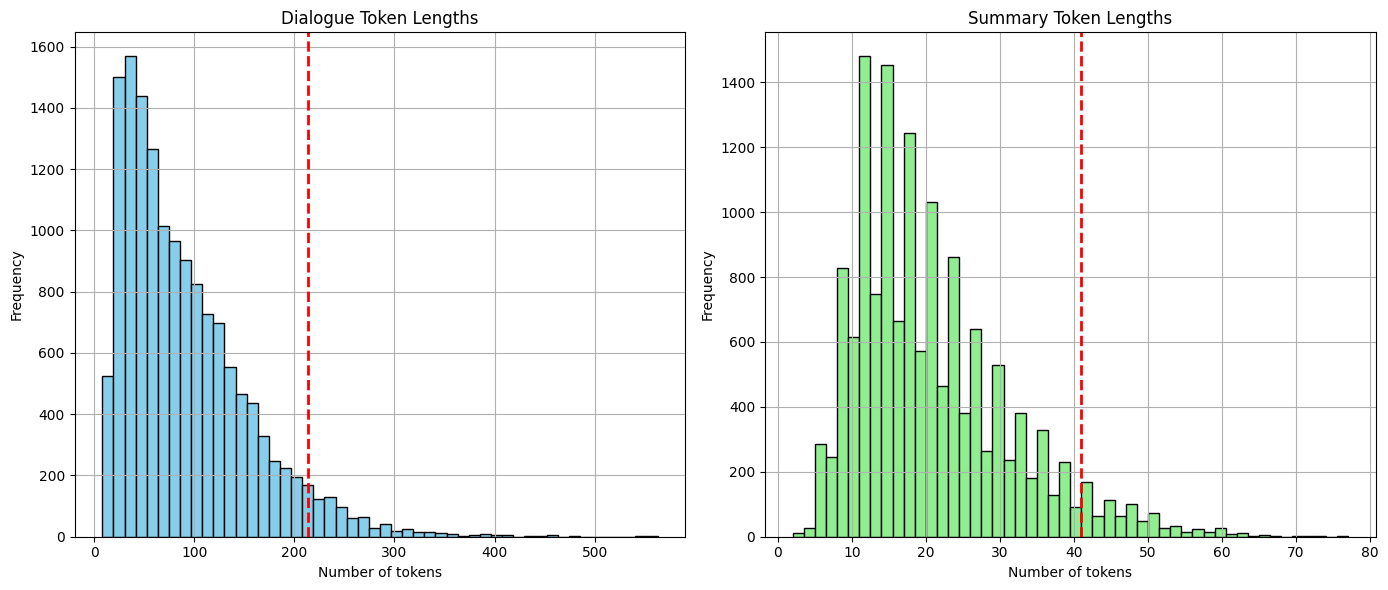

In [30]:
import matplotlib.pyplot as plt

dialogue_lengths = train_data["dialogue"].apply(lambda x: len(tokenizer.encode(x, truncation=False)))

summary_lengths = train_data["summary"].apply(lambda x: len(tokenizer.encode(x, truncation=False)))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(dialogue_lengths, bins=50, color='skyblue', edgecolor='black')
plt.axvline(dialogue_lengths.quantile(0.95), color='red', linestyle='dashed', linewidth=2)
plt.title("Dialogue Token Lengths")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(summary_lengths, bins=50, color='lightgreen', edgecolor='black')
plt.axvline(summary_lengths.quantile(0.95), color='red', linestyle='dashed', linewidth=2)
plt.title("Summary Token Lengths")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()


In [16]:
from datasets import Dataset

train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)


train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)
test_dataset = Dataset.from_pandas(test_data)

# Tokenizer

In [17]:
def tokenization(example):
    model_inputs = tokenizer(
        example["dialogue"],
        max_length=int(max_input_len),
        truncation=True,
        padding="max_length"
    )

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            example["summary"],
            max_length=int(max_target_len),
            truncation=True,
            padding="max_length"
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


In [18]:
tokenized_train = train_dataset.map(tokenization, batched=False)
tokenized_val = val_dataset.map(tokenization, batched=False)

Map: 100%|██████████| 818/818 [00:00<00:00, 1390.48 examples/s]


In [19]:
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback
training_args = TrainingArguments(
    output_dir="./t5_summarizer",
    eval_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=4,
    metric_for_best_model="eval_loss",
    load_best_model_at_end=True,
    save_strategy="epoch",
    logging_steps=50,
    learning_rate=5e-5,
    weight_decay=0.01,
    save_total_limit=2,
    report_to="none"
)

# Training

In [20]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,1.262600,1.151004
2,1.220300,1.116849
3,1.133400,1.101589
4,1.150800,1.102826


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=14732, training_loss=1.2548236297972009, metrics={'train_runtime': 1952.3141, 'train_samples_per_second': 30.182, 'train_steps_per_second': 7.546, 'total_flos': 3333250754543616.0, 'train_loss': 1.2548236297972009, 'epoch': 4.0})

# Save Model & Load Model

In [21]:
model.save_pretrained("models/t5_summarizer_model")
tokenizer.save_pretrained("models/t5_summarizer_model")

('models/t5_summarizer_model\\tokenizer_config.json',
 'models/t5_summarizer_model\\special_tokens_map.json',
 'models/t5_summarizer_model\\spiece.model',
 'models/t5_summarizer_model\\added_tokens.json')

In [22]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model = T5ForConditionalGeneration.from_pretrained("models/t5_summarizer_model")
tokenizer = T5Tokenizer.from_pretrained("models/t5_summarizer_model")

In [23]:
def summarize_dialogue(dialogue):
    dialogue = Preprocessing_text(dialogue)  
    
    inputs = tokenizer(dialogue, return_tensors="pt", truncation=True, padding="max_length", max_length=512)

    outputs = model.generate(
        inputs["input_ids"],
        max_length=150,
        min_length=30,
        num_beams=4,
        length_penalty=2.0,
        early_stopping=True
    )

    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

In [24]:
from tqdm import tqdm 
tqdm.pandas()  

test_data["predicted_summary"] = test_data["dialogue"].progress_apply(summarize_dialogue)


100%|██████████| 819/819 [27:03<00:00,  1.98s/it]    


In [25]:
for i in range(3):
    print(f"Example {i+1}")
    print("=" * 50)
    print(f"🔹 Dialogue:\n{test_data['dialogue'].iloc[i]}\n")
    print(f"True Summary:\n{test_data['summary'].iloc[i]}\n")
    print(f"Predicted Summary:\n{test_data['predicted_summary'].iloc[i]}")
    print("=" * 50)


Example 1
🔹 Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

True Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.

Predicted Summary:
hannah cant find bettys number amanda ask larry called last time park together hannah text hannah
Example 2
🔹 Dialogue:
Eric: MACHINE!
Rob: That's so gr8!
Eric: I know! And shows how Americans see Russian ;)
Rob: And it's really funny!
Eric: I know! I especially like the train part!
Rob: Hahaha! No one talks to the machine like that!
Eric: Is this his only stand-up?
Rob: Idk. I'll check.
Eric: Sure.
Rob: Turns out no! There are some of his stand-u

In [26]:
!pip install evaluate
!pip install rouge_score
!pip install bert_score

In [27]:
from evaluate import load

bertscore = load("bertscore")

results = bertscore.compute(
    predictions=test_data["predicted_summary"].tolist(),
    references=test_data["summary"].tolist(),
    lang="en"  
)

print("BERTScore:")
print(f"Precision: {sum(results['precision']) / len(results['precision']):.4f}")
print(f"Recall:    {sum(results['recall']) / len(results['recall']):.4f}")
print(f"F1:        {sum(results['f1']) / len(results['f1']):.4f}")


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore:
Precision: 0.8158
Recall:    0.8568
F1:        0.8356


In [28]:
rouge = load("rouge")

results = rouge.compute(
    predictions=test_data["predicted_summary"].tolist(),
    references=test_data["summary"].tolist()
)

print("ROUGE Scores:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")    

ROUGE Scores:
rouge1: 0.3023
rouge2: 0.0479
rougeL: 0.2511
rougeLsum: 0.2511
